In [1]:
import os
import glob
import datetime
import statistics
import numpy as np
import pandas as pd
import import_ipynb
from marcap import marcap_data
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

In [16]:
DATA_DIR = 'data/daily/8-1'

In [17]:
# from qp import get_stocks # 1/PBR + GP/A
from ncav import get_stocks # NCAV

In [18]:
df_account = pd.DataFrame(columns=['start_date', 'end_date', 'filepath'])
filepaths = glob.glob(DATA_DIR + "/*.csv")
filepaths = sorted(filepaths)

days = []
for i in range(len(filepaths)):
    if i < len(filepaths) - 1: # exclude last item
        start_date =  os.path.basename(filepaths[i])[:-4]
        end_date =  os.path.basename(filepaths[i + 1])[:-4]
        
        day = {'start_date':start_date, 'end_date':end_date, 'filepath':filepaths[i]}
        days.append(day)

df_account = df_account.append(days)

In [19]:
df_account

,start_date,end_date,filepath
0,2002-08-01,2003-08-01,data/daily/8-1/2002-08-01.csv
1,2003-08-01,2004-08-02,data/daily/8-1/2003-08-01.csv
2,2004-08-02,2005-08-01,data/daily/8-1/2004-08-02.csv
3,2005-08-01,2006-08-01,data/daily/8-1/2005-08-01.csv
4,2006-08-01,2007-08-01,data/daily/8-1/2006-08-01.csv
5,2007-08-01,2008-08-01,data/daily/8-1/2007-08-01.csv
6,2008-08-01,2009-08-03,data/daily/8-1/2008-08-01.csv
7,2009-08-03,2010-08-02,data/daily/8-1/2009-08-03.csv
8,2010-08-02,2011-08-01,data/daily/8-1/2010-08-02.csv
9,2011-08-01,2012-08-01,data/daily/8-1/2011-08-01.csv


In [20]:
# 연도별 종목을 구한다.
df_account['stocks'] = df_account.apply(lambda x: get_stocks(x.filepath, x.start_date), axis=1)

------------------------------
2002-08-01 data/daily/8-1/2002-08-01.csv
30
------------------------------
2003-08-01 data/daily/8-1/2003-08-01.csv
30
------------------------------
2004-08-02 data/daily/8-1/2004-08-02.csv
30
------------------------------
2005-08-01 data/daily/8-1/2005-08-01.csv
30
------------------------------
2006-08-01 data/daily/8-1/2006-08-01.csv
30
------------------------------
2007-08-01 data/daily/8-1/2007-08-01.csv
9
------------------------------
2008-08-01 data/daily/8-1/2008-08-01.csv
30
------------------------------
2009-08-03 data/daily/8-1/2009-08-03.csv
30
------------------------------
2010-08-02 data/daily/8-1/2010-08-02.csv
30
------------------------------
2011-08-01 data/daily/8-1/2011-08-01.csv
30
------------------------------
2012-08-01 data/daily/8-1/2012-08-01.csv
30
------------------------------
2013-08-01 data/daily/8-1/2013-08-01.csv
30
------------------------------
2014-08-01 data/daily/8-1/2014-08-01.csv
29
--------------------------

In [21]:
# 연도별 수익률을 구한다.
df_account['yield'] = 0.0
df_account['yields'] = 0.0
df_account['yields'] = df_account['yields'].astype('object')

for i in range(len(filepaths)):
    if i < len(filepaths) - 1: # exclude last item
        start_date = df_account.iloc[i].start_date
        end_date = df_account.iloc[i].end_date
        
        df_this_year = pd.read_csv(filepaths[i], dtype={"기업코드":"string", "종목코드":"string"})[['종목코드', '주가']]
        df_next_year = pd.read_csv(filepaths[i + 1], dtype={"기업코드":"string", "종목코드":"string"})[['종목코드', '주가']]
        
        stocks = df_account.iloc[i].stocks   
        yields = []
        
        # 종목별 수익률을 구한다.
        for stock in stocks:
            start_price = df_this_year[df_this_year['종목코드'] == stock]['주가'].iloc[0]
            end_price = df_next_year[df_next_year['종목코드'] == stock]['주가']
            
            if len(end_price) == 0:
                end_price = 0
            else:                    
                end_price = end_price.fillna(0) # 가격 정보가 없을 경우 상폐
                end_price = end_price.iloc[0]
            
            # get yield
            yields.append(end_price / start_price)

        # stock 수익률들의 avg가 total 수익률이 된다. (동일 비중이기 때문에)
        mean_yields = statistics.mean(yields)
        df_account.at[i, 'yield'] = mean_yields
        df_account.at[i, 'yields'] = yields
        
        print(start_date, '~', end_date, ":", mean_yields)
        
        #break

2002-08-01 ~ 2003-08-01 : 0.9154558999049316
2003-08-01 ~ 2004-08-02 : 0.9192392934463903
2004-08-02 ~ 2005-08-01 : 2.0761306396126464
2005-08-01 ~ 2006-08-01 : 1.2514597486242864
2006-08-01 ~ 2007-08-01 : 1.741671561162505
2007-08-01 ~ 2008-08-01 : 0.7673252079558258
2008-08-01 ~ 2009-08-03 : 1.1238483301112774
2009-08-03 ~ 2010-08-02 : 1.2709441340911471
2010-08-02 ~ 2011-08-01 : 1.2214213375263192
2011-08-01 ~ 2012-08-01 : 1.287942176248536
2012-08-01 ~ 2013-08-01 : 1.2355637021528612
2013-08-01 ~ 2014-08-01 : 1.1157250979783677
2014-08-01 ~ 2015-08-03 : 1.6049066960198886
2015-08-03 ~ 2016-08-01 : 1.0971025949974476
2016-08-01 ~ 2017-08-01 : 1.05306753492111
2017-08-01 ~ 2018-08-01 : 1.685870333122165
2018-08-01 ~ 2019-08-01 : 1.2146830586768744


In [22]:
df_account['total'] = df_account['yield'].cumprod()

In [23]:
df_account['cagr'] = 0.0
for i, row in enumerate(df_account.iterrows()):
    df_account.at[i, 'cagr'] = pow(row[1]['total'], 1/(i+1))

In [24]:
def get_win_rate(yield_rates):
    return sum([yield_rate > 1.0 for yield_rate in yield_rates]) / len(yield_rates)

df_account['win_rate'] = df_account.apply(lambda x: get_win_rate(x['yields']), axis=1)

In [25]:
df_account['best_corp'] = df_account.apply(lambda x: max(x['yields']), axis=1)
df_account['worst_corp'] = df_account.apply(lambda x: min(x['yields']), axis=1)

In [26]:
df_account['best_stock_code'] = df_account.apply(lambda x: x['stocks'][np.argmax(x['yields'])], axis=1)
df_account['worst_stock_code'] = df_account.apply(lambda x: x['stocks'][np.argmin(x['yields'])], axis=1)

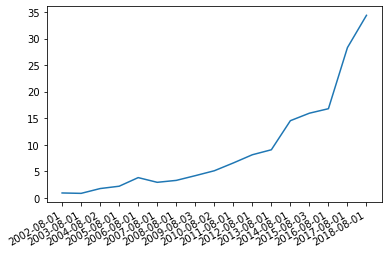

In [27]:
fig, ax = plt.subplots()
ax.plot_date(df_account['start_date'], df_account['total'], marker='', linestyle='-')
fig.autofmt_xdate()
plt.show()

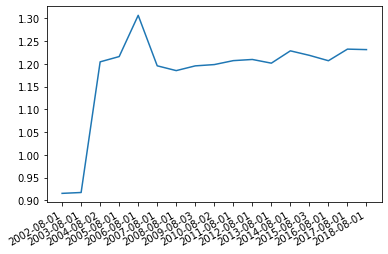

In [28]:
fig, ax = plt.subplots()
ax.plot_date(df_account['start_date'], df_account['cagr'], marker='', linestyle='-')
fig.autofmt_xdate()
plt.show()

In [29]:
df_account

,start_date,end_date,filepath,stocks,yield,yields,total,cagr,win_rate,best_corp,worst_corp,best_stock_code,worst_stock_code
0,2002-08-01,2003-08-01,data/daily/8-1/2002-08-01.csv,"[002290, 003830, 011160, 002600, 004920, 02106...",0.915456,"[0.9142857142857143, 0.9212121212121213, 0.792...",0.915456,0.915456,0.233333,2.941368,0.441667,036030,032580
1,2003-08-01,2004-08-02,data/daily/8-1/2003-08-01.csv,"[005450, 003090, 017000, 004920, 002290, 00870...",0.919239,"[0.8454935622317596, 0.53470715835141, 0.22981...",0.841523,0.917346,0.300000,2.255319,0.058878,008700,007770
2,2004-08-02,2005-08-01,data/daily/8-1/2004-08-02.csv,"[005390, 000800, 002290, 005450, 004920, 02694...",2.076131,"[2.5798319327731094, 2.5807291666666665, 1.607...",1.747112,1.204408,1.000000,4.468085,1.278970,037460,009450
3,2005-08-01,2006-08-01,data/daily/8-1/2005-08-01.csv,"[002290, 004920, 032420, 028090, 004060, 00945...",1.251460,"[2.393992932862191, 1.8309523809523809, 0.6019...",2.186440,1.216002,0.766667,2.393993,0.601990,002290,032420
4,2006-08-01,2007-08-01,data/daily/8-1/2006-08-01.csv,"[034830, 005980, 031310, 065940, 033320, 02588...",1.741672,"[2.0773809523809526, 1.445736434108527, 1.5798...",3.808060,1.306594,0.966667,2.831858,0.337838,008420,026940
5,2007-08-01,2008-08-01,data/daily/8-1/2007-08-01.csv,"[065940, 008110, 034830, 038680, 015110, 00229...",0.767325,"[0.7944915254237288, 1.3333333333333333, 0.659...",2.922021,1.195677,0.111111,1.333333,0.578035,008110,015110
6,2008-08-01,2009-08-03,data/daily/8-1/2008-08-01.csv,"[005190, 017000, 086980, 004060, 045050, 03483...",1.123848,"[1.0598802395209581, 0.2880658436213992, 1.050...",3.283908,1.185141,0.466667,4.037162,0.288066,078520,017000
7,2009-08-03,2010-08-02,data/daily/8-1/2009-08-03.csv,"[013120, 019570, 011080, 038680, 002290, 01336...",1.270944,"[0.8098068350668648, 0.4444444444444444, 0.896...",4.173664,1.195542,0.400000,10.570236,0.132530,004920,004060
8,2010-08-02,2011-08-01,data/daily/8-1/2010-08-02.csv,"[013120, 057880, 011080, 008600, 013360, 03334...",1.221421,"[1.5596330275229358, 0.8048289738430584, 0.9, ...",5.097802,1.198390,0.500000,7.512315,0.288889,065940,008600
9,2011-08-01,2012-08-01,data/daily/8-1/2011-08-01.csv,"[015110, 011080, 057880, 002410, 013120, 00229...",1.287942,"[0.50633608815427, 1.7073170731707317, 0.9575,...",6.565674,1.207057,0.600000,5.292683,0.000000,031860,002410


In [ ]:
# df_account.to_csv('backtest-output/' + DATA_DIR + '.csv', index=False)